<h3>Bootstrap sample</h3>

- Bootstrap sample refers to a single resampled dataset drawn with replacement from the original dataset.

- Each bootstrap sample has the same number of observations as the original dataset, but with possible duplicates (because the data points are drawn with replacement (i.e., the same data point can be drawn multiple times)).

<h3>Bootstrap estimate</h3>

- Bootstrap estimate refers to a statistic (e.g., mean, correlation, standard deviation) calculated from the bootstrap sample.
- Each bootstrap sample produces one bootstrap estimate.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/herrakaava/Documents/school/intro_comp_stats/data/airquality.csv', index_col=0)

In [3]:
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5


In [4]:
df.rename(columns={'Solar.R': 'Solar_R'}, inplace=True)

In [5]:
df.shape

(153, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 1 to 153
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar_R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 8.4 KB


In [7]:
df.isna().any()

Ozone       True
Solar_R     True
Wind       False
Temp       False
Month      False
Day        False
dtype: bool

In [8]:
df = df.dropna()

In [9]:
df.shape

(111, 6)

In [10]:
def t(data):
    """
    The estimator.
    """
    return data.corr().loc['Temp', 'Ozone']

In [11]:
def bootstrap(data, n):
    # Initialize an empty array to store the bs estimates
    bs_estimates = np.zeros(n)
    
    # Generate n bs samples
    n_rows = data.shape[0]
    for i in range(n):
        # Bootstrap sample
        sample_indices = np.random.choice(a=n_rows, size=n_rows, replace=True)
        
        # Compute the bs estimate from the bs sample, and store it
        bs_estimates[i] = t(data.iloc[sample_indices])
    
    return bs_estimates

In [21]:
bs_corr = bootstrap(df, n=10000)

- `bs_corr` contains 10000 bootstrap estimates.
- A statistic calculated from the `bs_corr` array represents a bootstrap **estimator**,because it approximates the sampling distribution of the original estimator.
- In bootstrap methodology, `bs_corr`, which is a collection of bootstrap estimates, is referred to as bootstrap **distribution**.

In [29]:
# The bootstrap estimator
np.mean(bs_corr)

np.float64(0.7023390900729177)

In [31]:
np.std(bs_corr)

np.float64(0.04804826190914116)

In [30]:
# The original estimator
t(df)

np.float64(0.6985414096486392)

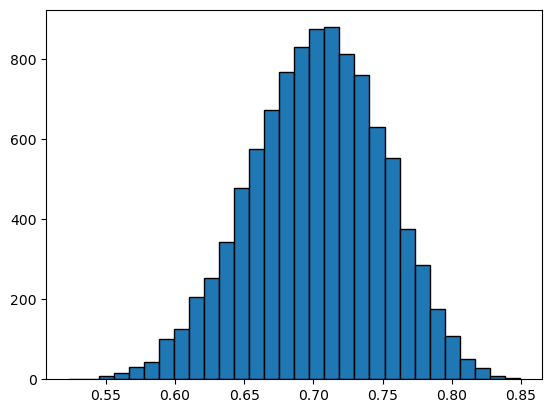

In [23]:
plt.hist(bs_corr, bins=30, edgecolor='black');

In [24]:
# Estimate the bias of the estimator
bias = np.mean(bs_corr) - t(df)

In [25]:
bias

np.float64(0.0037976804242785267)

In [26]:
# Harhakorjattu estimaatti
t(df) - bias

np.float64(0.6947437292243607)